El marcado telefónico es un caso de uso de la transformada de Fourier.

Se basa en el sistema de Dual Tone Multi-Frequency (DTMF).
![figuras/touchtone0.jpg](figuras/touchtone0.jpg)

In [21]:
%matplotlib inline
# !pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sig
import scipy
from scipy.fftpack import fft,ifft

fr = [697,770,852,941]
fc = [1209,1336,1477]

In [48]:
s = '8'
if s=='*':
    k = 3
    j = 0
elif s =='0':
    k = 3
    j = 1
elif s =='#':
    k = 3
    j = 2
else:
    d = int(s)
    j = int((d-1)%3)
    k = int((d-j-1)/3)
print(k,j)

2 1


In [49]:
Fs = 32768 # Frecuencia de muestreo
t = np.arange(round(0.25*Fs)) / Fs

In [50]:
y1 = np.sin(2*np.pi*fr[k]*t);
y2 = np.sin(2*np.pi*fc[j]*t);
y = (y1 + y2)/2
sf.write('tono8.wav',y,Fs)


(0.1, 0.12)

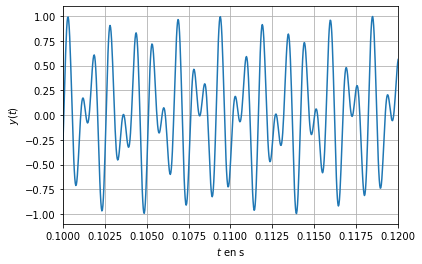

In [33]:
plt.plot(t, y)
plt.xlabel(r'$t$ en s')
plt.ylabel(r'$y(t)$')
plt.grid()
plt.xlim([0.1,0.12])

[697, 770, 852, 941]
[1209, 1336, 1477]


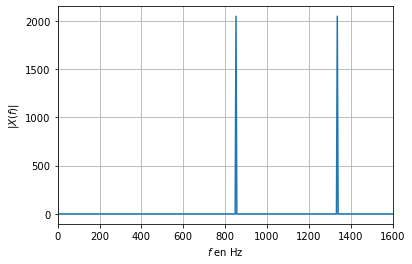

In [51]:
nel = len(y)
X_fft = fft(y) # calculate fourier transform (complex numbers list)
f = np.linspace(0,Fs,nel)
plt.plot(f,abs(X_fft)) 
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()
plt.xlim([0,1600])
print(fr)
print(fc)

Cuando se hace la marcación de un número, la señal enviada es:

![figuras/touchtone2.jpg](figuras/touchtone2.jpg)

Su espectro sería similar a:
![figuras/touchtone3.jpg](figuras/touchtone3.jpg)

Si se analiza por intervalos cortos de tiempo:

![figuras/touchtone4.jpg](figuras/touchtone4.jpg)

- ¿Puede diseñar una máquina que detecte el número marcado?